# Importação

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

base=pd.read_csv('/content/census.csv')
base.head()

age          workclass  final-weight   education  education-num  \
0   39          State-gov         77516   Bachelors             13   
1   50   Self-emp-not-inc         83311   Bachelors             13   
2   38            Private        215646     HS-grad              9   
3   53            Private        234721        11th              7   
4   28            Private        338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loos  hour-per-week  native-country  income  
0          2174             0             40   United-States   <=50K  
1             0             0             13   United-States   <=50K  
2             0             0             40   United-States   <=50K  
3             0             0             40   United-States   <=50K  
4             0             0             40            Cuba   <=50K

In [2]:
#verifica-se que não há valores faltantes
base.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

# Visualização

In [ ]:
# ver valores do target
np.unique(base['workclass'],return_counts=True)

(array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
        ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
       dtype=object),
 array([ 1836,   960,  2093,     7, 22696,  1116,  2541,  1298,    14]))

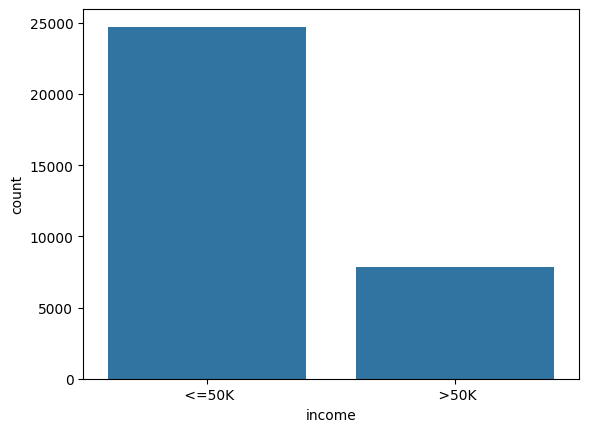

In [ ]:
sns.countplot(x=base['income']);

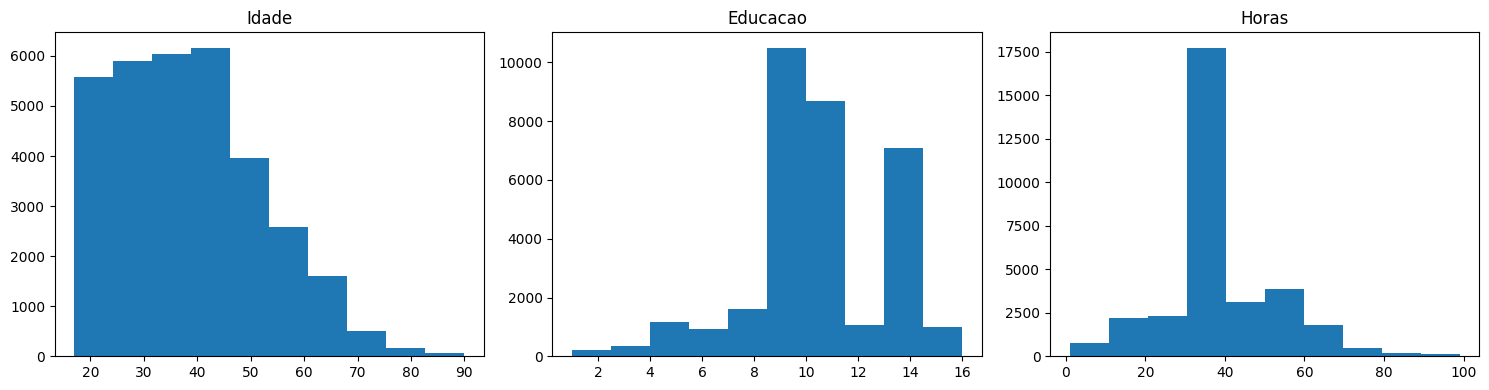

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 linha, 3 colunas

# Histograma da idade
axes[0].hist(base['age'])
axes[0].set_title('Idade')

# Histograma da renda
axes[1].hist(base['education-num'])
axes[1].set_title('Educacao')

# Histograma da renda
axes[2].hist(base['hour-per-week'])
axes[2].set_title('Horas')

plt.tight_layout()  # Ajusta o espaçamento automaticamente
plt.show()

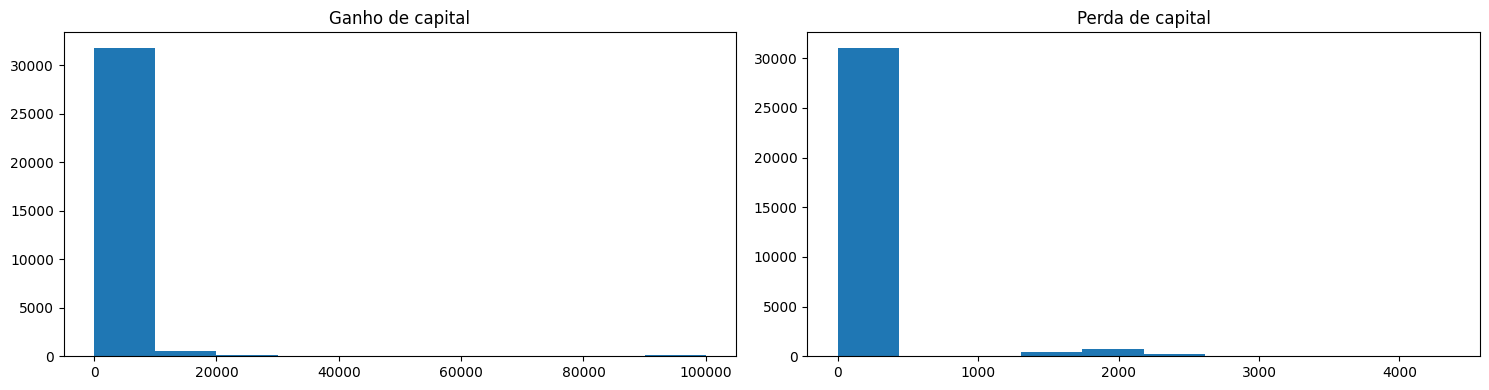

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))  # 1 linha, 3 colunas

# Histograma da idade
axes[0].hist(base['capital-gain'])
axes[0].set_title('Ganho de capital')

# Histograma da renda
axes[1].hist(base['capital-loos'])
axes[1].set_title('Perda de capital')


plt.tight_layout()  # Ajusta o espaçamento automaticamente
plt.show()

In [ ]:
grafico=px.treemap(base,path=['workclass','age'])
grafico.show()

In [ ]:
grafico=px.parallel_categories(base, dimensions=['occupation','relationship'])
grafico.show()

# Preparo Base Treinamento e Teste

In [3]:
features = base.iloc[:,0:14].values
target = base.iloc[:,14].values
features[:,1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

 TRATAMENTO DE ATRIBUTOS CATEGORICOS

In [4]:
# LABEL ENCONDER
# transforma categoria em números
from sklearn.preprocessing import LabelEncoder

label_encoder_workclass=LabelEncoder()
label_encoder_education=LabelEncoder()
label_encoder_marital_status=LabelEncoder()
label_encoder_occupation=LabelEncoder()
label_encoder_relationship=LabelEncoder()
label_encoder_race=LabelEncoder()
label_encoder_sex=LabelEncoder()
label_encoder_country=LabelEncoder()

features[:,1]=label_encoder_workclass.fit_transform(features[:,1])
features[:,3]=label_encoder_education.fit_transform(features[:,3])
features[:,5]=label_encoder_marital_status.fit_transform(features[:,5])
features[:,6]=label_encoder_occupation.fit_transform(features[:,6])
features[:,7]=label_encoder_relationship.fit_transform(features[:,7])
features[:,8]=label_encoder_race.fit_transform(features[:,8])
features[:,9]=label_encoder_sex.fit_transform(features[:,9])
features[:,13]=label_encoder_country.fit_transform(features[:,13])

In [5]:
# ONE HOT ENCODER
# nivelar a importância das colunas

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
oneHot = ColumnTransformer(transformers=[('OneHot',OneHotEncoder(),[1,3,5,6,7,8,9,13])], remainder='passthrough')
features = oneHot.fit_transform(features).toarray()

 ESCALONAMENTO DE VALORES

In [6]:
from sklearn.preprocessing import StandardScaler
scaler_credit=StandardScaler()
features = scaler_credit.fit_transform(features)
features

array([[-0.2444502 , -0.17429511, -0.26209736, ...,  0.1484529 ,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -2.22215312],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       ...,
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -1.65522476],
       [-0.2444502 , -0.17429511, -0.26209736, ...,  1.88842434,
        -0.21665953, -0.03542945]])

Divisao Treino e Teste

In [7]:
from sklearn.model_selection import train_test_split
# 15% de teste:
# de 32561 registros ---> treinamento: 27676 registros ,  teste: 4885 regsitros
# Obs: apenas 15% de teste  poque a base é maior

features_treinamento, features_teste, target_treinamento,target_teste = train_test_split(features, target, test_size=.15, random_state=0)

print( features_treinamento.shape, features_teste.shape, target_treinamento.shape,target_teste.shape)

(27676, 108) (4885, 108) (27676,) (4885,)


# Treinamento

In [14]:
from sklearn.ensemble import RandomForestClassifier
floresta=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
floresta.fit(features_treinamento, target_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [15]:
previsao=floresta.predict(features_teste)
previsao

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(target_teste,previsao)

0.8507676560900717

Previsão

Desempenho :  Accuraty: comparar a 'previsao' com o target_teste

support: é base de teste, com 4885 registros onde 3693 recebem menos e 1192 recebem mais

Recall: algoritmo consegue identificar corretamente       
*   93% : 3420 / (3420 + 273) dos que recebem menos
*   62%   : 736 / (456 + 736) dos que recebem mais

Precision: quando  identifica
* quem recebe menos, acerta 88% = 3420 / (3420 + 456)          
* quem recebe mais,  acerta 73% = 736 / (273 + 736)

0.8507676560900717

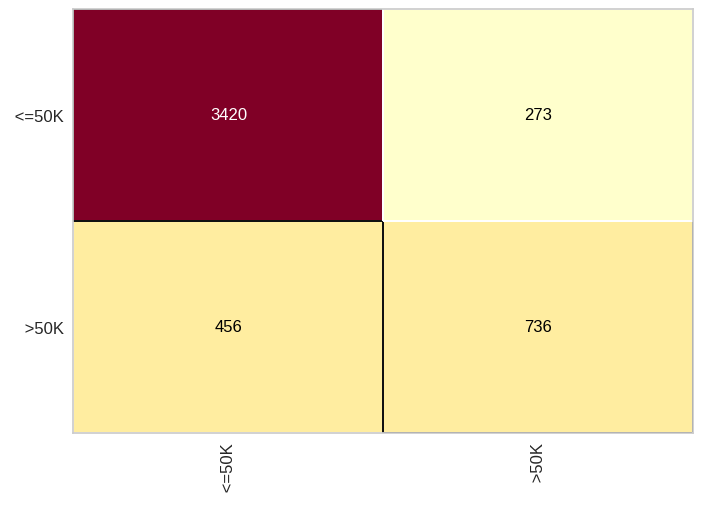

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(floresta)
cm.fit(features_treinamento, target_treinamento)
cm.score(features_teste, target_teste)

In [ ]:
print(classification_report(target_teste, previsao))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885

